In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Read X & y

In [336]:
X = pd.read_csv('../../data/training_set_features.csv')
y = pd.read_csv('../../data/training_set_labels.csv')

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (26707, 36)
y shape: (26707, 3)


In [337]:
data = X.merge(y, on = 'respondent_id')
data.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...  rent_or_own   employment_status  \
0                    1.0  ...          Own  Not in Labor Force   
1                    1.0  ...         Rent            Employed   
2                    0.0  ...          Own            Employed   
3                    0.0  ...         Rent  Not in Labor Force   
4                    1.0  ...          Own            Employed   

   hhs_geo_region                census_msa  household_adults  \
0        oxchjgsf                   Non-MSA               0.0   
1        bhuqouqj  MSA, Not Principle  City               0.0   
2        qufhixun  MSA, Not Principle  City               2.0   
3        lrircsnp       MSA, Principle City               0.0   
4        qufhixun  MSA, Not Principle  City               1.0   

   household_children  employment_industry  employment_occupation  \
0                 0.0                  NaN                    NaN   
1                 0.0             pxcmvdjn               xgwztkwe   
2                 0.0             rucpziij               xtkaffoo   
3                 0.0                  NaN                    NaN   
4                 0.0             wxleyezf               emcorrxb   

   h1n1_vaccine  seasonal_vaccine  
0             0                 0  
1             0                 1  
2             0                 0  
3             0                 1  
4             0                 0  

[5 rows x 38 columns]

#### Read test features as well to see their NaNs, distributions

In [338]:
test = pd.read_csv('../../data/test_set_features.csv')

## Exploration
we have 2 outcome variables (2 different models will be used, or 1 multilabel model)
1. h1n1_vaccine - Whether respondent received H1N1 flu vaccine
2. seasonal_vaccine - Whether respondent received seasonal flu vaccine

### Class balance checks

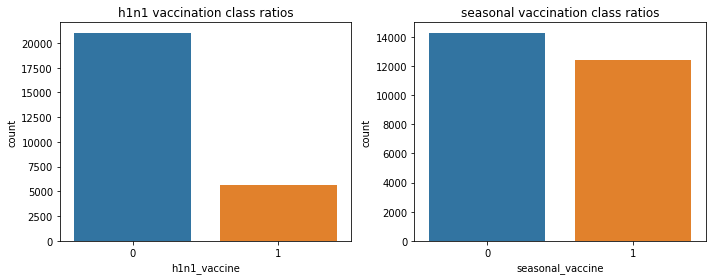

In [339]:
fig, ax = plt.subplots(figsize = (10, 4), ncols = 2)

sns.countplot(data['h1n1_vaccine'], ax = ax[0])
sns.countplot(data['seasonal_vaccine'], ax = ax[1])

ax[0].set_title('h1n1 vaccination class ratios')
ax[1].set_title('seasonal vaccination class ratios')

plt.tight_layout()
plt.show()

In [340]:
data['h1n1_vaccine'].value_counts(normalize = True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

I may need to use some sort of class balancing tecnhique for h1n1, as the ratio there is 80-to-20 for the favor of 0 class

### Xs

In [341]:
data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [342]:
test.isnull().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

Both train and test sets have NaNs to deal with

In [343]:
data_columns = data.columns.tolist()
data_columns.remove('respondent_id')

In [344]:
for col in data_columns:
    print(data[col].value_counts(dropna = False), '\n')

2.0    10575
1.0     8153
3.0     4591
0.0     3296
NaN       92
Name: h1n1_concern, dtype: int64 

1.0    14598
2.0     9487
0.0     2506
NaN      116
Name: h1n1_knowledge, dtype: int64 

0.0    25335
1.0     1301
NaN       71
Name: behavioral_antiviral_meds, dtype: int64 

1.0    19228
0.0     7271
NaN      208
Name: behavioral_avoidance, dtype: int64 

0.0    24847
1.0     1841
NaN       19
Name: behavioral_face_mask, dtype: int64 

1.0    22015
0.0     4650
NaN       42
Name: behavioral_wash_hands, dtype: int64 

0.0    17073
1.0     9547
NaN       87
Name: behavioral_large_gatherings, dtype: int64 

0.0    17644
1.0     8981
NaN       82
Name: behavioral_outside_home, dtype: int64 

1.0    18001
0.0     8578
NaN      128
Name: behavioral_touch_face, dtype: int64 

0.0    19139
1.0     5408
NaN     2160
Name: doctor_recc_h1n1, dtype: int64 

0.0    16453
1.0     8094
NaN     2160
Name: doctor_recc_seasonal, dtype: int64 

0.0    18446
1.0     7290
NaN      971
Name: chronic_med_con

In [345]:
def drops_nans(df):
    
    df['employment_industry_known'] = df['employment_industry'].fillna('unknown').apply(lambda x: 1 if x != 'unknown' else 0)
    df['employment_occupation_known'] = df['employment_occupation'].fillna('unknown').apply(lambda x: 1 if x != 'unknown' else 0)
    
    df['sex_male'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)
    df['marital_status_married'] = df['marital_status'].apply(lambda x: 1 if x == 'Married' else (0 if x == 'Not Married' else x))
    df['rent_or_own_own'] = df['rent_or_own'].apply(lambda x: 1 if x == 'Own' else (0 if x == 'Rent' else x))

    df.drop(['employment_industry', 'employment_occupation', 'sex', 'marital_status', 'rent_or_own'], 1, inplace = True)
    
    return df

In [346]:
data = drops_nans(data)
test = drops_nans(test)

## Feature engineering
#### 1. CatBoost

CatBoost doesn't need one-hot encoding, so we're basically done, just need to save 2 dataframes, 1 predicting h1n1, 1 predicting seasonal shots

#### 2. xgBoost, LightGBM & co...

One-hot encoding is necessary, so will do and then will explore correlations

### For CatBoost

In [347]:
h1n1_cat = data.drop(['respondent_id', 'seasonal_vaccine'], 1).copy()
seasonal_cat = data.drop(['respondent_id', 'h1n1_vaccine'], 1).copy()
test_cat = test.copy()

h1n1_cat.to_csv('../../data/h1n1_catboost.csv', index = False)
seasonal_cat.to_csv('../../data/seasonal_catboost.csv', index = False)
test_cat.to_csv('../../data/test_catboost.csv', index = False)

### One hot encoding and exploring correlations

In [348]:
to_one_hot_encode_h1n1 = h1n1.dtypes[h1n1.dtypes == 'O'].index.tolist()
to_one_hot_encode_seasonal = seasonal.dtypes[seasonal.dtypes == 'O'].index.tolist()
to_one_hot_encode_test = test.dtypes[test.dtypes == 'O'].index.tolist()

In [349]:
#print(np.setdiff1d(h1n1.columns.tolist(), to_one_hot_encode_h1n1).tolist())
#print(np.setdiff1d(seasonal.columns.tolist(), to_one_hot_encode_seasonal).tolist())
#print(np.setdiff1d(test.columns.tolist(), to_one_hot_encode_test).tolist())

In [350]:
h1n1 = pd.get_dummies(h1n1, prefix_sep = ' = ', columns = to_one_hot_encode_h1n1)
seasonal = pd.get_dummies(seasonal, prefix_sep = ' = ', columns = to_one_hot_encode_seasonal)
test = pd.get_dummies(test, prefix_sep = ' = ', columns = to_one_hot_encode_test)

#### Check correlations
Using the h1n1 data (Xs are the same for seasonal)

In [351]:
def calc_rel_std(feature, data):
    return data[feature].std() / data[feature].mean() 

In [352]:
h1n1_cor = h1n1.corr().mask(np.tril(np.ones(h1n1.corr().shape)).astype(np.bool))
h1n1_cor = h1n1_cor[abs(h1n1_cor) >= 0.6].stack().reset_index().rename(columns = {'level_0' : 'feature_1', 'level_1' : 'feature_2', 0 : 'correlation'})
h1n1_cor.sort_values('correlation', ascending = False, inplace = True)

h1n1_cor['feature_1_relstd'] = h1n1_cor['feature_1'].apply(lambda x: calc_rel_std(x, h1n1))
h1n1_cor['feature_2_relstd'] = h1n1_cor['feature_2'].apply(lambda x: calc_rel_std(x, h1n1)) 

h1n1_cor

feature_1                               feature_2  \
1     employment_industry_known            employment_status = Employed   
3   employment_occupation_known            employment_status = Employed   
0     employment_industry_known             employment_occupation_known   
4   employment_occupation_known  employment_status = Not in Labor Force   
2     employment_industry_known  employment_status = Not in Labor Force   
5  employment_status = Employed  employment_status = Not in Labor Force   

   correlation  feature_1_relstd  feature_2_relstd  
1     0.986388          0.998260          0.984672  
3     0.976100          1.008782          0.984672  
0     0.972945          0.998260          1.008782  
4    -0.781167          1.008782          1.269039  
2    -0.789401          0.998260          1.269039  
5    -0.800294          0.984672          1.269039

Will drop the empoyment_known features, the employment_status captures most of the information

In [353]:
h1n1.drop(['employment_industry_known', 'employment_occupation_known'], 1, inplace = True)
seasonal.drop(['employment_industry_known', 'employment_occupation_known'], 1, inplace = True)
test.drop(['employment_industry_known', 'employment_occupation_known'], 1, inplace = True)

In [356]:
h1n1_cat.drop(['employment_industry_known', 'employment_occupation_known'], 1, inplace = True)
seasonal_cat.drop(['employment_industry_known', 'employment_occupation_known'], 1, inplace = True)
test_cat.drop(['employment_industry_known', 'employment_occupation_known'], 1, inplace = True)

h1n1_cat.to_csv('../../data/h1n1_catboost.csv', index = False)
seasonal_cat.to_csv('../../data/seasonal_catboost.csv', index = False)
test_cat.to_csv('../../data/test_catboost.csv', index = False)

In [361]:
h1n1.to_csv('../../data/h1n1_encoded.csv', index = False)
seasonal.to_csv('../../data/seasonal_encoded.csv', index = False)
test.to_csv('../../data/test_encoded.csv', index = False)

### Deprecated

In [ ]:
def drops_nans(df):
    
    df['h1n1_concern'].fillna('unknown', inplace = True)
    df['h1n1_knowledge'].fillna('unknown', inplace = True)
    df['behavioral_antiviral_meds'].fillna('unknown', inplace = True)
    df['behavioral_avoidance'].fillna('unknown', inplace = True)
    df['behavioral_face_mask'].fillna('unknown', inplace = True)
    df['behavioral_wash_hands'].fillna('unknown', inplace = True)
    df['behavioral_large_gatherings'].fillna('unknown', inplace = True)
    df['behavioral_outside_home'].fillna('unknown', inplace = True)
    df['behavioral_touch_face'].fillna('unknown', inplace = True)
    df['doctor_recc_h1n1'].fillna('unknown', inplace = True)
    df['doctor_recc_seasonal'].fillna('unknown', inplace = True)
    df['chronic_med_condition'].fillna('unknown', inplace = True)
    df['child_under_6_months'].fillna('unknown', inplace = True)
    df['health_worker'].fillna('unknown', inplace = True)
    df['health_insurance'].fillna('unknown', inplace = True)
    df['opinion_h1n1_vacc_effective'].fillna('unknown', inplace = True)
    df['opinion_h1n1_risk'].fillna('unknown', inplace = True)
    df['opinion_h1n1_sick_from_vacc'].fillna('unknown', inplace = True)
    df['opinion_seas_vacc_effective'].fillna('unknown', inplace = True)
    df['opinion_seas_risk'].fillna('unknown', inplace = True)
    df['opinion_seas_sick_from_vacc'].fillna('unknown', inplace = True)
    df['education'].fillna('unknown', inplace = True)
    df['income_poverty'].fillna('unknown', inplace = True)
    df['marital_status'].fillna('unknown', inplace = True)
    df['rent_or_own'].fillna('unknown', inplace = True)
    df['employment_status'].fillna('unknown', inplace = True)
    df['household_adults'].fillna('unknown', inplace = True)
    df['household_children'].fillna('unknown', inplace = True)
    
    df['employment_industry_known'] = df['employment_industry'].fillna('unknown').apply(lambda x: 1 if x != 'unknown' else 0)
    df['employment_occupation_known'] = df['employment_occupation'].fillna('unknown').apply(lambda x: 1 if x != 'unknown' else 0)
    
    df['sex_male'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)
    df.drop(['employment_industry', 'employment_occupation', 'sex'], 1, inplace = True)
    
    return df

In [ ]:
print('Before dropping unknowns')
print(h1n1.shape)
print(seasonal.shape)
print(test.shape)

drop_cols = h1n1.filter(like = 'unknown', axis = 1).columns.tolist() 

h1n1.drop(drop_cols, 1, inplace = True)
seasonal.drop(drop_cols, 1, inplace = True)
test.drop(drop_cols, 1, inplace = True)

print('\nAfter dropping unknowns')
print(h1n1.shape)
print(seasonal.shape)
print(test.shape)